In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1, l2, L1L2

In [3]:
from tensorflow.keras.regularizers import l1, l2, L1L2

In [4]:
import time
from IPython.display import clear_output

In [7]:
# wget https://raw.githubusercontent.com/dhrim/t-academy_2021/master/material/deep_learning/iris.csv

In [5]:
iris = pd.read_csv("iris.csv")
iris.head()

,septal_length,septal_width,petal_length,petal_width,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,0,0,1
1,5.0,2.3,3.3,1.0,0,1,0
2,4.9,2.5,4.5,1.7,0,0,1
3,4.9,3.1,1.5,0.1,1,0,0
4,5.7,3.8,1.7,0.3,1,0,0


In [6]:
data = iris.to_numpy()

x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [7]:
def build_model():
    model = Sequential()    
    model.add(Dense(10, activation='relu', input_shape=(4,)),)
    model.add(Dense(10, activation='relu'),)
    model.add(Dense(3, activation='softmax'))
    
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
    return model

In [70]:
class PlotLosses(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.accuracies = []
        self.val_accuracies = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.accuracies.append(logs.get('accuracy'))
        self.val_accuracies.append(logs.get('val_accuracy'))
        self.i += 1

        clear_output(wait=True)
        
        fig, ax = plt.subplots()
        ax.plot(self.x, self.losses, label="loss")
        ax.plot(self.x, self.val_losses, label="val_loss")
        
        ax2 = ax.twinx()
        ax2.plot(self.x, self.accuracies, label="accuracy")
        ax2.plot(self.x, self.val_accuracies, label="val_accuracy")
        
        # plt.plot(self.x, self.losses, label="loss")
        # plt.plot(self.x, self.val_losses, label="val_loss")
        # plt.plot(self.x, self.accuracies, label="accuracy")
        # plt.plot(self.x, self.val_accuracies, label="val_accuracy")
        ax.legend()
        ax2.legend()
        plt.show();
        txt = f"""loss = {self.losses[-1]}\n\
        val_loss = {self.val_losses[-1]}\n\
        acc = {self.accuracies[-1]}\n\
        val_accuracy = {self.val_accuracies[-1]}"""

        print(txt)

In [71]:
def fit_one_more(model, train_x, train_y, test_x, test_y, callbacks, batch_size=20):
    start_time = time.time()
    history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size, 
                validation_split=0.1, callbacks=callbacks)
    # model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size,
    #           validation_data=(test_x, test_y))
    print("elapsed : {}".format(time.time() - start_time))
    return history

In [72]:
model = build_model()

In [73]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_34 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_35 (Dense)             (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [74]:
model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_learning_rate=0.001)

callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]

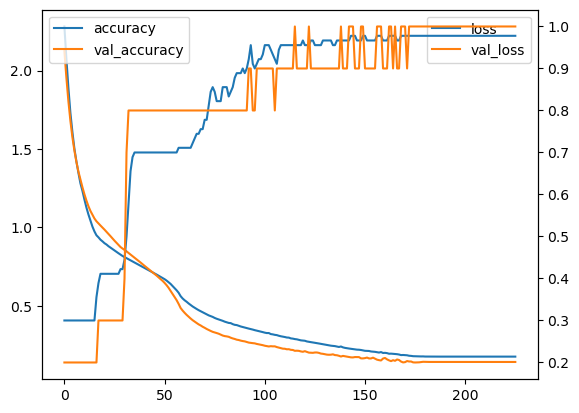

loss = 0.17563912934727138
val_loss = 0.14154796302318573            
acc = 0.9777777791023254
val_accuracy = 1.0
Epoch 00226: early stopping
elapsed : 30.502623081207275


In [75]:
history = fit_one_more(model, train_x, train_y, test_x, test_y, callbacks=callbacks, batch_size=20)